# Math Modelling: Test Problem 2 
We can see from inspection that if we are transferring $x$ amount of fluid from source $a$ with coffee and tea amounts $(a_t, a_c)$ to destination $b$ with coffee and tea amounts $(b_t, b_c)$ then the "formula" to figure out the new amounts is
$$\begin{array}{l}
f := a_t + a_c \\
f_t := \frac{a_t}{f} * x \\
f_c := \frac{a_c}{f} * x \\
a_t := a_t - f_t \\
a_c := b_t - f_c \\
b_t := b_t + f_t \\ 
b_c := b_c + f_c \\ 
\end{array}$$
We can easily write some code that simulates this process, then try it for different values.

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np

def transfer(src, dest, amt):
	total_vol = src["tea"] + src["coffee"]
	tea_trans = src["tea"]/total_vol * amt
	coffee_trans = src["coffee"]/total_vol * amt
	src["tea"] -= tea_trans
	src["coffee"] -= coffee_trans
	dest["tea"] += tea_trans
	dest["coffee"] += coffee_trans  
	return src, dest

def run_process(samovar_tea, bottle_coffee, amt):
	data = []
	samovar = {"tea": samovar_tea, "coffee": 0}
	bottle = {"tea": 0, "coffee": bottle_coffee}
	for i in range(11):
		samovar, bottle = transfer(samovar, bottle, amt)
		data.append([samovar["tea"],samovar["coffee"], bottle["tea"], bottle["coffee"]])
		bottle, samovar = transfer(bottle, samovar, amt)
		data.append([samovar["tea"],samovar["coffee"], bottle["tea"], bottle["coffee"]])
	df = pd.DataFrame(data,columns=["samovar tea", "samovar coffee", "bottle tea", "bottle coffee"], \
                     index=range(len(data)))
	df.plot()
	return df


,samovar tea,samovar coffee,bottle tea,bottle coffee
0,19.000000,0.000000,1.000000,10.000000
1,19.090909,0.909091,0.909091,9.090909
2,18.136364,0.863636,1.863636,9.136364
3,18.305785,1.694215,1.694215,8.305785
4,17.390496,1.609504,2.609504,8.390496
5,17.627724,2.372276,2.372276,7.627724
6,16.746337,2.253663,3.253663,7.746337
7,17.042125,2.957875,2.957875,7.042125
8,16.190019,2.809981,3.809981,7.190019
9,16.536381,3.463619,3.463619,6.536381


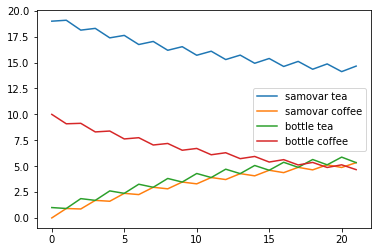

In [82]:
# If volume of samovar is greater than volume of bottle:
run_process(20,10,1)

,samovar tea,samovar coffee,bottle tea,bottle coffee
0,9.000000,0.000000,1.000000,20.000000
1,9.047619,0.952381,0.952381,19.047619
2,8.142857,0.857143,1.857143,19.142857
3,8.231293,1.768707,1.768707,18.231293
4,7.408163,1.591837,2.591837,18.408163
5,7.531584,2.468416,2.468416,17.531584
6,6.778426,2.221574,3.221574,17.778426
7,6.931834,3.068166,3.068166,16.931834
8,6.238651,2.761349,3.761349,17.238651
9,6.417762,3.582238,3.582238,16.417762


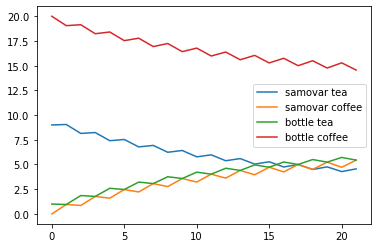

In [83]:
# If volume of samovar is less than volume of bottle:
run_process(10,20,1)

,samovar tea,samovar coffee,bottle tea,bottle coffee
0,9.000000,0.000000,1.000000,10.000000
1,9.090909,0.909091,0.909091,9.090909
2,8.181818,0.818182,1.818182,9.181818
3,8.347107,1.652893,1.652893,8.347107
4,7.512397,1.487603,2.487603,8.512397
5,7.738542,2.261458,2.261458,7.738542
6,6.964688,2.035312,3.035312,7.964688
7,7.240626,2.759374,2.759374,7.240626
8,6.516563,2.483437,3.483437,7.516563
9,6.833239,3.166761,3.166761,6.833239


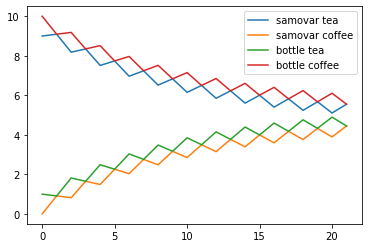

In [84]:
# If samovar and bottle have same value:
run_process(10,10,1)

It appears that the volumes of coffee in the samovar and tea in the bottle almost exactly the same. 